In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data_csv/amiwea.csv", parse_dates=["timestamp"])
df = df.set_index("timestamp")  #데이터로드

FileNotFoundError: [Errno 2] No such file or directory: './data_csv/amiwea.csv'

In [ ]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/7e/65/07d5f5c7f7c994f12c768708bd2e17a4f01a2b0f44a1c9eccad872433e2e/matplotlib-3.10.8-cp312-cp312-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.2 MB/s eta 0:00:00
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/53/3e/405b59cfa13021a56bba395a6b3aca8cec012b45bf177b0eaf7a202cde2c/contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/6f/16/7decaa24a1bd3a70c607b2e29f0adc6159f36a7e40eaba59846414765fd4/fonttools-4.61.1-cp

In [ ]:
df.info()       #데이터 로드가 제대로 됐는지 확인

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2013-03-01 00:00:00 to 2014-02-28 23:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   household_id  8760 non-null   object 
 1   consumption   8760 non-null   float64
 2   Season        8760 non-null   object 
 3   temperature   8758 non-null   float64
 4   humidity      8758 non-null   float64
 5   windSpeed     8758 non-null   float64
dtypes: float64(4), object(2)
memory usage: 479.1+ KB


#### AMI 원천 시계열 데이터 증명 및 시간에 따른 변동성, 피크/저부하 구간이 존재 

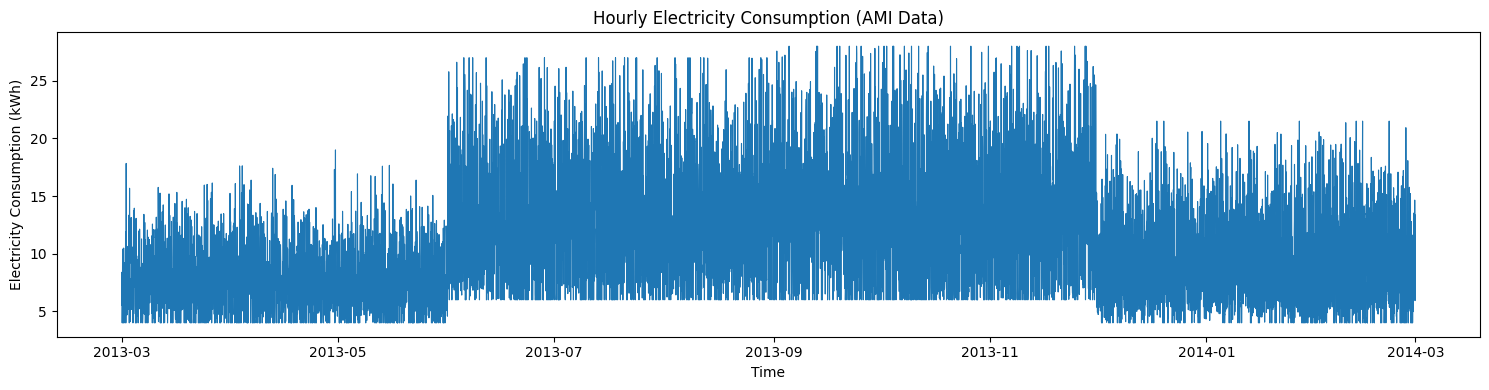

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(df.index, df["consumption"], linewidth=0.8)
plt.title("Hourly Electricity Consumption (AMI Data)")
plt.xlabel("Time")
plt.ylabel("Electricity Consumption (kWh)")
plt.tight_layout()
plt.show()

#### 하루 평균으로 smoothing

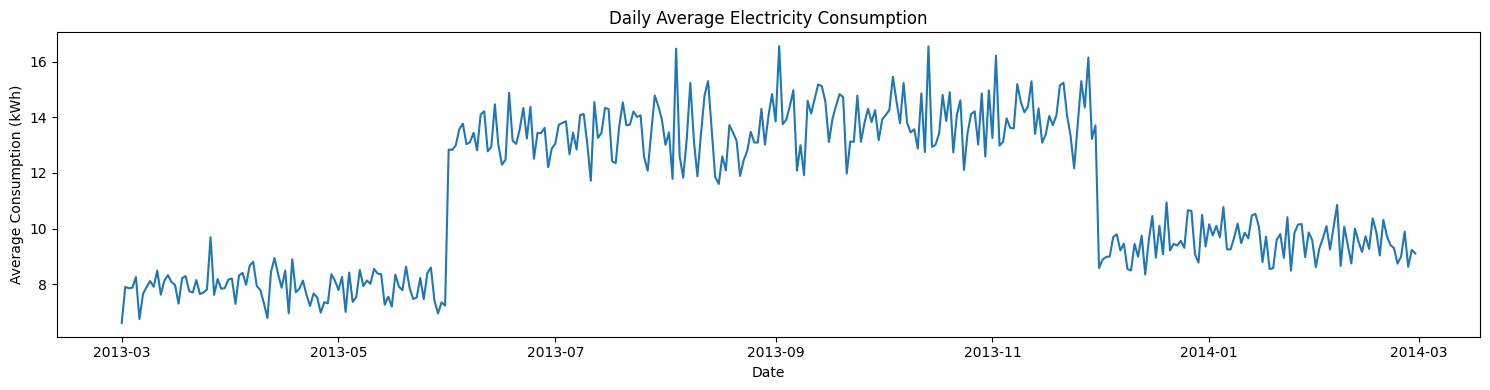

In [ ]:
daily_mean = df["consumption"].resample("D").mean()

plt.figure(figsize=(15, 4))
plt.plot(daily_mean.index, daily_mean, linewidth=1.5)
plt.title("Daily Average Electricity Consumption")
plt.xlabel("Date")
plt.ylabel("Average Consumption (kWh)")
plt.tight_layout()
plt.show()

##### 시간 단위 스마트미터(AMI) 데이터를 시계열로 시각화한 결과, 일중·계절적 변동 패턴이 명확히 관찰되었으며, 이는 수요 예측 및 에너지 관리 시스템(EMS)에 활용 가능한 특성을 보여준다.